In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df = pd.read_excel(r"D:\INNOMATICS\DATA ANALYTICS\01-Python\final project\data_cleaned_df (1).xlsx")

In [3]:
df.insert(8,"Discount",df.Original_price-df.Discounted_price)

In [4]:
df.head()

Hotel     Location  Ratings   
0  ibis Styles Goa Calangute - An Accor Brand    Calangute      4.1  \
1                       Caravela Beach Resort  Varca Beach      4.3   
2                Turtle Beach Resort - Morjim       Morjim      3.8   
3                       Majestic Eco Comforts        Varca      4.5   
4             I Love Bell Bottoms Vagator Goa      Vagator      4.2   

   No_of_Ratings  Original_price  Discounted_price  Taxes  Final_price   
0           4361            5600              5600    672         6272  \
1           4564           21499             21499   3870        25369   
2           1210            3900              1420    488         1908   
3           1776            3750              2388    720         3108   
4           1273            9327              4221    999         5220   

   Discount                 House_Rule hotel_type price_range  
0         0  Unmarried Couples Allowed     4 star      medium  
1         0            Alcohol Allowed     5 star        high  
2      2480            Alcohol Allowed     3 star         low  
3      1362            No Restrictions     3 star         low  
4      5106  Unmarried Couples Allowed     4 star      medium

### uni variate analysis

In [5]:
df.columns

Index(['Hotel', 'Location', 'Ratings', 'No_of_Ratings', 'Original_price',
       'Discounted_price', 'Taxes', 'Final_price', 'Discount', 'House_Rule',
       'hotel_type', 'price_range'],
      dtype='object')

In [6]:
# Set plot style
sns.set(style="whitegrid")

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='hotel_type', ylabel='count'>

Text(0.5, 1.0, 'Count of Hotels by Star Rating')

Text(0.5, 0, 'Hotel Type (Star Rating)')

Text(0, 0.5, 'Count')

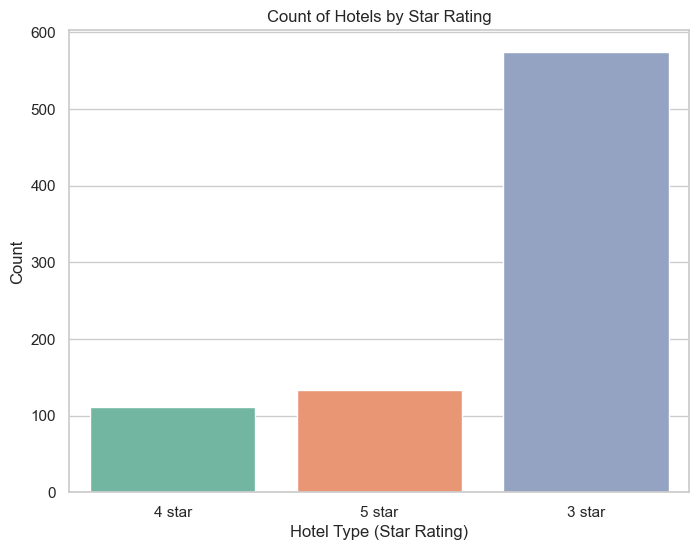

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='hotel_type', data=df, palette='Set2')
plt.title('Count of Hotels by Star Rating')
plt.xlabel('Hotel Type (Star Rating)')
plt.ylabel('Count')
plt.show()

- **Observations**
- Most hotels are mid-range: The majority of hotels in Goa are 3-star, Which means they offer comfortable accommodations at a resonable price.
- Luxury options are limited:There are fewer 4-star and 5-star hotels, so finding high-end luxury accommodations can be more challenging.
- Goa has a predominantly mid-range hotel market: Overall, most hotels in Goa fall into the midrange category, with limited options for luxury stays.

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='House_Rule', ylabel='count'>

Text(0.5, 1.0, 'House Rules in Hotels')

Text(0.5, 0, 'House Rule')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Unmarried Couples Allowed'),
  Text(1, 0, 'Alcohol Allowed'),
  Text(2, 0, 'No Restrictions'),
  Text(3, 0, 'Pets Allowed'),
  Text(4, 0, 'Smoking Allowed')])

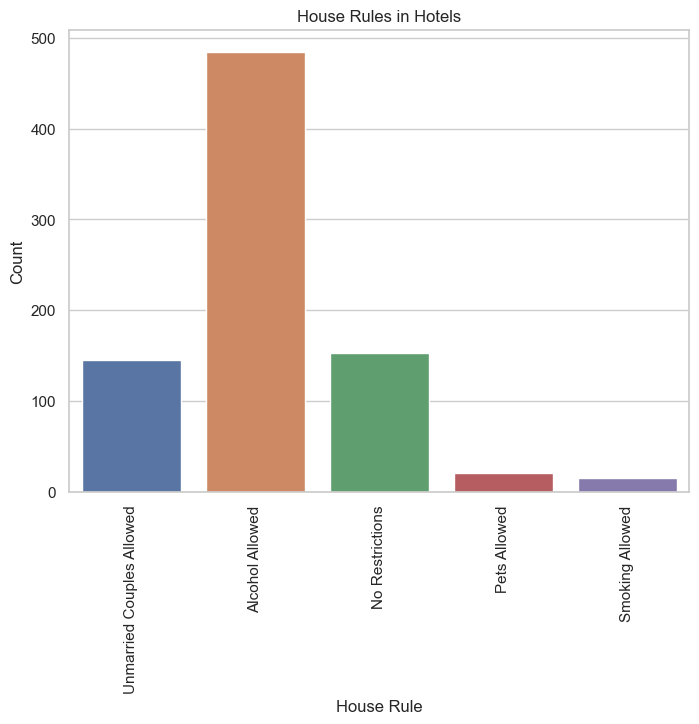

In [8]:
# 5. Bar Chart of House Rule
plt.figure(figsize=(8,6))
sns.countplot(x='House_Rule', data=df)
plt.title('House Rules in Hotels')
plt.xlabel('House Rule')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

- **Observations**
- **Alcohol is generally allowed:** Most hotels in Goa permit alcohol consumption, indicating it's a common practice.
- **Unmarried couples are welcome:** Many hotels allow unmarried couples to stay together, reflecting a more libQeral approach.
- **Pets and smoking are less common:** Few hotels allow pets or smoking, suggesting these practies may be restriced or less accepted.


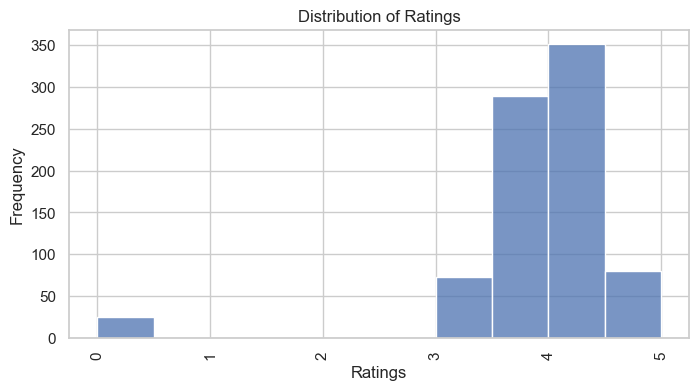

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel(r"D:\INNOMATICS\DATA ANALYTICS\01-Python\final project\data_cleaned_df (1).xlsx")

# Create a histogram for the 'Ratings' column
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Ratings', bins=10)  # Using histplot for histogram
plt.xticks(rotation=90)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show();

In [10]:
#df.Ratings.unique()-

- **Observations:**
- The majority of items have positive ratings, with 4 and 5 being the most common.
- There is a smaller proportion of items with lower ratings, indicating that the overall satisfaction level is generally high.
- The rightward skew suggests that there are a few items with exceptionally high ratings, which may be due to factors such as exceptional quality, unique features, or positive customer experiences.

In [11]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Define the numerical columns
numerical_cols = ['Original_price', 'Discounted_price', 'Taxes']

# Create subplots: 1 row, 4 columns for side-by-side box plots
fig = make_subplots(rows=1, cols=len(numerical_cols), subplot_titles=numerical_cols)

# Add a box plot for each numerical column to the subplots
for i, col in enumerate(numerical_cols):
    box = px.box(df, y=col).data[0]  # Extract the box plot figure data
    fig.add_trace(box, row=1, col=i+1)
    fig.update_yaxes(title_text=col, row=1, col=i+1)  # Add labels for each subplot

# Update layout for better visualization and avoiding overlapping labels
fig.update_layout(
    height=600, 
    width=1200, 
    title_text="Box Plots of Numerical Columns",
    margin=dict(l=50, r=50, b=100, t=100),  # Increase margins
    title_x=0.5,  # Center title
    showlegend=False
)

# Adjust x-axis label orientation and prevent overlap
for i in range(1, len(numerical_cols) + 1):
    fig.update_xaxes(tickangle=45, row=1, col=i)  # Rotate x-axis labels if needed

plt.tight_layout()
fig.show()


<Figure size 640x480 with 0 Axes>

-  Price Distributions: All three distributions (discounted prices, taxes, and original prices) are skewed to the right, meaning there are a few items with very high prices. 
- Discounted prices have the widest range, followed by original prices, and then taxes.
- Relationship Between Prices: Higher discounted prices often correspond to higher taxes. Original prices generally have a wider range than discounted prices and taxes.
- Key Price Ranges: Most items fall within these ranges:Discounted prices: 5,000-15,000 rupees
- Taxes: 500-1,500 rupees
- Original prices: 10,000-20,000 rupees
-  Outliers: A few items have exceptionally high prices in all categories, suggesting they might be luxury items or have unique characteristics.
- Factors Influencing Prices: To fully understand pricing, we need to consider factors like product categories, pricing strategies, and government regulations.









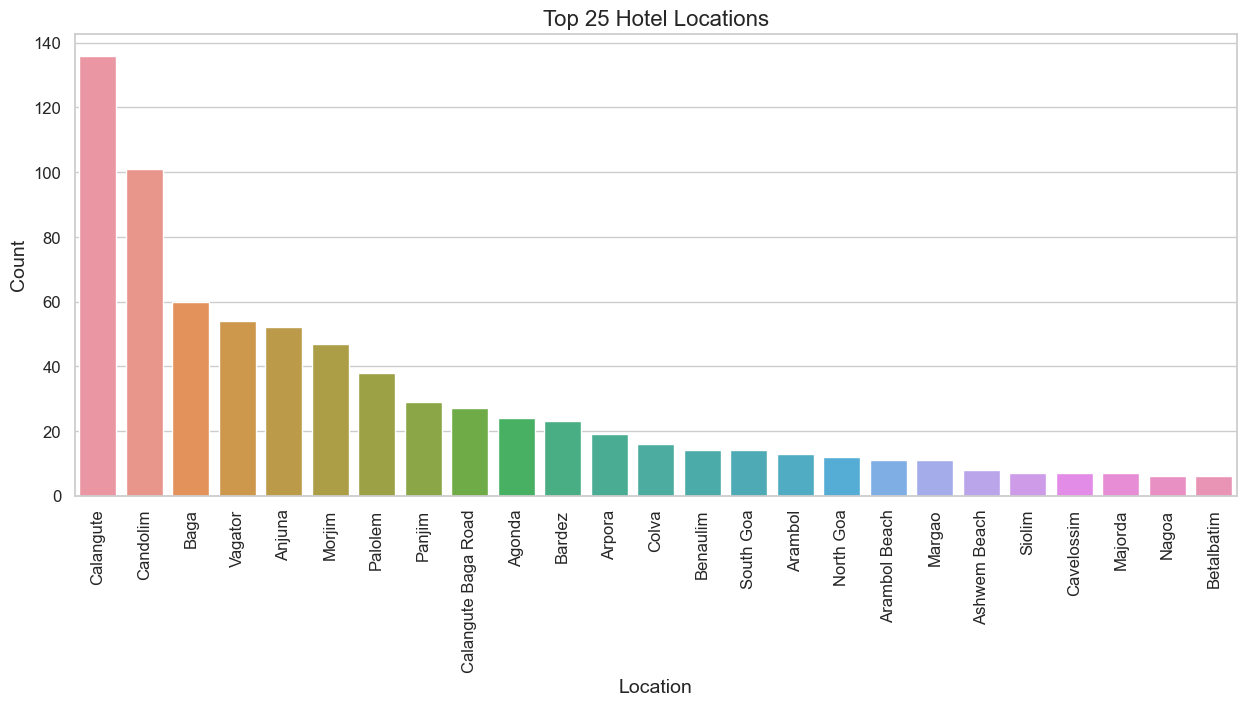

In [29]:
plt.figure(figsize=(15, 6))
plt.title("Top 25 Hotel Locations", fontsize=16)
plt.xticks(rotation=90, fontsize=12)  # Increasing the size of the x-axis labels
plt.yticks(fontsize=12)  # Increasing the size of the y-axis labels

# Creating a count plot for the 'Location' column, showing the top 25 locations
sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index[:25])

# Adding labels for the axes with increased font size
plt.xlabel("Location", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.show();


- **Observations:**
- Calangute is the most popular hotel location, with a significantly higher count compared to the others.
- Candolim, Panjim, Baga, and Vagator follow closely behind, forming a cluster of popular destinations.
- North Goa dominates the list, with most of the top locations clustered in this region. This suggests that North Goa is a more preferred destination for tourists.
- South Goa has a few locations represented, such as Colva, Agonda, Palolem, and Benaulim, indicating that it is also a popular choice, albeit to a lesser extent compared to North Goa.

### Bivarient 

In [13]:
df.No_of_Ratings.median()

132.0

In [14]:
#df.columns

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='hotel_type', ylabel='count'>

Text(0.5, 1.0, 'Count of Hotels with House Rules by Hotel Type')

Text(0.5, 0, 'Hotel Type')

Text(0, 0.5, 'Count of Hotels')

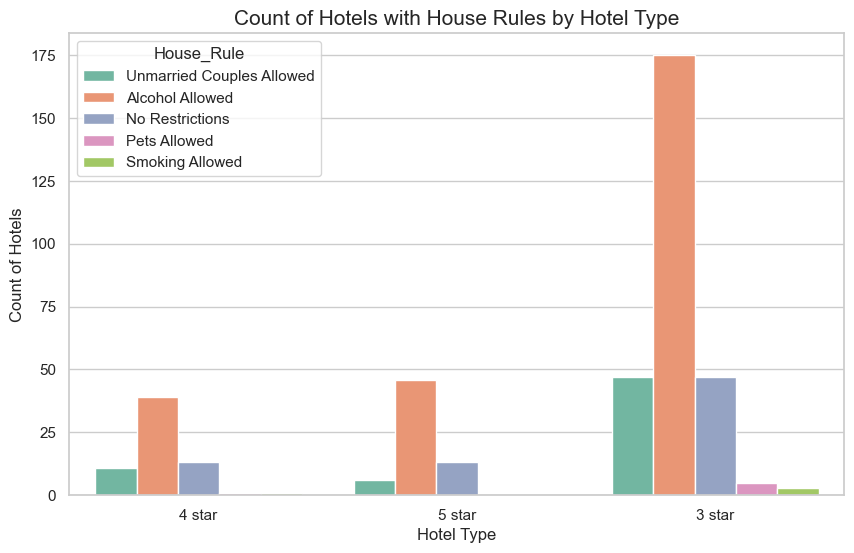

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter hotels with house rules
hotels_with_house_rules = df[(df['House_Rule'].notna()& (df["No_of_Ratings"]>df.No_of_Ratings.median()))]

# Create a count plot for hotel type with house rules
plt.figure(figsize=(10, 6))
sns.countplot(data=hotels_with_house_rules, x='hotel_type', hue='House_Rule', palette='Set2')

# Add a title and labels
plt.title('Count of Hotels with House Rules by Hotel Type', fontsize=15)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Count of Hotels', fontsize=12)

# Display the plot
plt.show()


- **Observations:**
- **3-star Hotels Dominate in Allowing Alcohol:** The most significant feature in the chart is that 3-star hotels completely allowed alcohol,with more than 150 hotels following this rule.
- **No Restrictions in 3-star Hotels:** A large number of 3-star also have no restrictions in terms of house rules,which may suggest a more relaxed or guest-friendly policy compared to high star hotels.
- **House Rules in 4-star and 5-star Hotels:** Alcohol allowed is also common rule in 4-star and 5-star hotels,but the counts are considerbly lower compared to 3-star
- No restrictions and alcohol allowed are the most frequent policies for both 4-star and 5-star
- **Pets and Smoking:**: Pet-friendly and smoking-friendly hotels are very limited across all categories
- **Unmarried Couples:** There are very few hotels across all types that explicitly allowed unmarried couples.

In [16]:
#df.columns

In [17]:
#df.House_Rule.value_counts()

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='Final_price', ylabel='Ratings'>

Text(0.5, 1.0, 'Ratings vs. Final Price by Hotel Type')

Text(0.5, 0, 'Final Price')

Text(0, 0.5, 'Ratings')

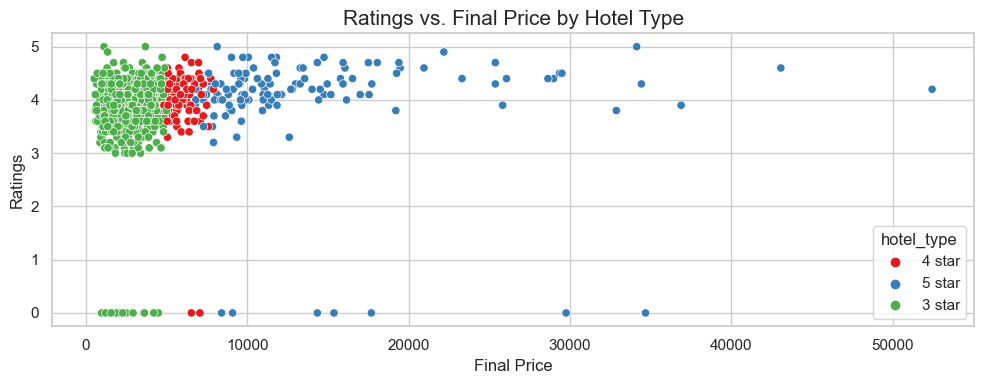

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 4))

# Create the scatter plot
sns.scatterplot(x='Final_price', y="Ratings", data=df, hue="hotel_type",palette='Set1' )

# Add a title and labels
plt.title("Ratings vs. Final Price by Hotel Type", fontsize=15)
plt.xlabel('Final Price', fontsize=12)
plt.ylabel('Ratings', fontsize=12)

# Add a legend with a title and place it outside the plot
#plt.legend(title="Hotel Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()


- **Observations**
- There apprears to be a general trend of higher ratings being associated with higher final prices.This suggest that customers are willing to pay more for hotels with better ratings.
- **5-star hotels:** The data points for 5-star hotela are generally clustered in the higher ratings and higher final price range, suggesting that they tend have both higher ratings and higher prices.
- **4-star hotels:** The data points for 4-star hotels are more spread out across the plot, indicating a wider range of rating and prices.
- Some 4-star hotels may have high ratings and high prices, while other may have lower ratings and lower prices
- **3-star hotels:** The data points for 3-star hotels are generally clustered in the lower rating and lower final price range,suggest that they tend lower rating and lower prices.
- There are a few outliers in the plot, particularly for hotels with high final prices and relatively low ratings. These could be due to various factors, such as promotional offers, clearance sales, or individual hotel characteristics.

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='Final_price', ylabel='Ratings'>

Text(0.5, 1.0, ' Ratings vs Final Price by House_Rule')

Text(0.5, 0, 'Final Price')

Text(0, 0.5, 'Number of Ratings')

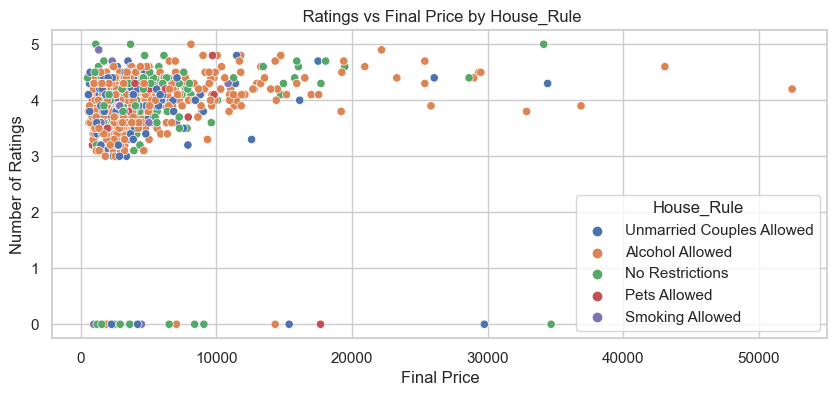

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Create a scatter plot
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Final_price', y='Ratings', hue='House_Rule', data=df)
plt.title(' Ratings vs Final Price by House_Rule')
plt.xlabel('Final Price')
plt.ylabel('Number of Ratings')
plt.show()




- **Unmarried Couples Allowed:** This house rule doesn't seem to significantly affect ratings or prices.
- **Alcohol Allowed:** Items allowing alcohol often have higher ratings and prices. This might suggest that customers value this feature.
- **No Restrictions:** While scattered, there's a slight tendency for items with no restrictions to have higher ratings and prices.
-  **Pets Allowed:** Items allowing pets might be perceived as less desirable, leading to lower ratings and prices.
- **Smoking Allowed:** Similarly, smoking-allowed items could have lower ratings and prices, as many customers prefer smoke-free environments.

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='Ratings', ylabel='Discounted_price'>

Text(0.5, 1.0, 'Ratings vs. Discount Price by House Rule')

Text(0.5, 0, 'Ratings')

Text(0, 0.5, 'Original Price')

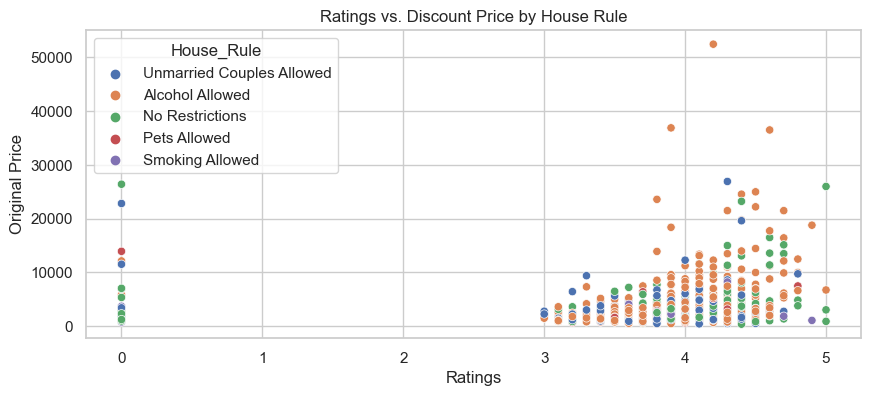

In [20]:

plt.figure(figsize=(10, 4))
sns.scatterplot(x='Ratings', y='Discounted_price', hue='House_Rule', data=df)
plt.title('Ratings vs. Discount Price by House Rule')
plt.xlabel('Ratings')
plt.ylabel('Original Price')
plt.show()

- **Observations**
- Generally, items with higher ratings tend to have lower discount prices. This suggests that customers may be more willing to pay a higher price for items with good reviews.
- Items that allow alcohol often have higher ratings and lower discounts. This might indicate that customers value the convenience of being able to enjoy alcoholic beverages on-site.
-  Unmarried Couples Allowed house rule doesn't seem to have a significant impact on either ratings or discounts. It might be a less important factor for customers when making purchasing decisions.
- Similarly, allowing pets doesn't appear to have a strong influence on ratings or discounts. This could suggest that customers are less concerned about pet policies when choosing accommodations.
- Items that allow smoking tend to have lower ratings and higher discounts. This might indicate that customers prefer smoke-free environments, and businesses may offer discounts to attract customers to smoking-allowed properties.

In [21]:
df.columns

Index(['Hotel', 'Location', 'Ratings', 'No_of_Ratings', 'Original_price',
       'Discounted_price', 'Taxes', 'Final_price', 'House_Rule', 'hotel_type',
       'price_range'],
      dtype='object')

In [1]:
# 4. Heatmap: Correlation between Original Price, Discount Price, and Taxes
plt.figure(figsize=(8, 6))
corr = df[['Final_price', 'Discount', 'Taxes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Final Price, Discount, and Taxes')
plt.show()

NameError: name 'plt' is not defined

- **Moderate correlation between final price and discount:** There is a moderate positive relationship between the final price and the discount. This suggests that while a higher discount can generally lead to a lower final price, other factors like the original price and taxes also play a role.
- **High correlation between final price and taxes:** The final price has a strong positive correlation with taxes. This means that as taxes increase, the final price also tendms to increase.
- **Moderate correlation between discount and taxes:** There is a moderate negative correlation between discount and taxes. This suggests that while a higher discount might be offered, the taxes associated with the product may still be relatively high.

df.columns

In [ ]:

plt.figure(figsize=(10, 4))
sns.scatterplot(x='Final_price', y='Discount', hue='hotel_type', data=df)
plt.title('final Price vs Discount Price by Building Type')
plt.xlabel('Final Price (in millions)')
plt.ylabel('Discount Price (in millions)')
plt.show()

- **Observations:**
- **5-Star Hotels:** Often have higher prices and offer larger discounts.
- **4-Star Hotels:** Have a wider range of prices and discounts.
- Some might have high prices with high discounts, while others might have lower prices and discounts.
- **3-Star Hotels:** Generally have lower prices and offer smaller discounts.
- There are a few outliers in the plot, particularly for hotels with high final prices and high discount prices.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ratings', y='Final_price', hue='House_Rule', data=df)
plt.title('Original Price vs Ratings by House Rule')
plt.xlabel('Ratings')
plt.ylabel('Original Price (in millions)')
plt.show()


NameError: name 'df' is not defined

<Figure size 800x600 with 0 Axes>

- **Observations:**
- **Unmarried Couples Allowed:** This house rule doesn't seem to significantly affect ratings or prices.
- **Alcohol Allowed:** Items allowing alcohol often have higher ratings and prices. This might suggest that customers value this feature.
- **No Restrictions:** While scattered, there's a slight tendency for items with no restrictions to have higher ratings and prices.
- **Pets Allowed:** Items allowing pets might be perceived as less desirable, leading to lower ratings and prices.
- **Smoking Allowed:** Similarly, smoking-allowed items could have lower ratings and prices, as many customers prefer smoke-free environments.
- There are a few outliers in the plot, particularly for items with high original prices and relatively low ratings.

In [ ]:
df.No_of_Ratings.mean()

In [ ]:
a=df[(df.No_of_Ratings>df.No_of_Ratings.mean())&(df.Ratings>4)&(df.House_Rule=="No Restrictions")].sort_values(by="Final_price")
a

In [ ]:
df["Final_price"].median()

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Hotel', ylabel='Final_price'>

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

Text(0.5, 1.0, 'Final Price of Hotels by Hotel Type')

Text(0.5, 0, 'Hotel')

Text(0, 0.5, 'Final Price')

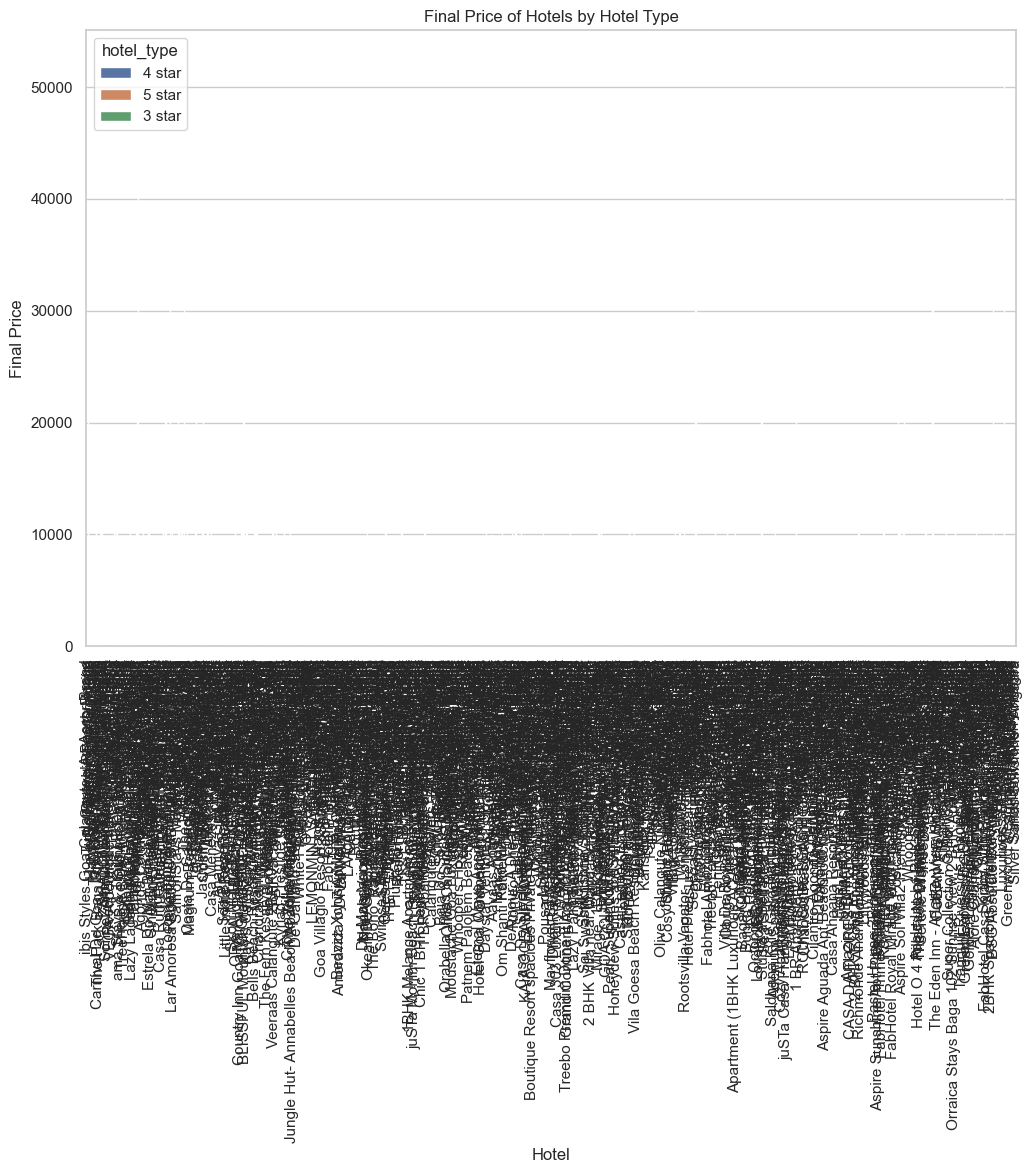

In [34]:
# Create a barplot to compare Final_price by Hotel and categorized by hotel_type
plt.figure(figsize=(12, 8))  # Adjust the figure size for better readability
sns.barplot(data=df, x="Hotel", y="Final_price", hue="hotel_type")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Final Price of Hotels by Hotel Type')
plt.xlabel('Hotel')
plt.ylabel('Final Price')
plt.show()

- **Observations:**
- The majority of hotels have final prices below 10,000 rupees.
- There are a few hotels with exceptionally high final prices, exceeding 15,000 rupees.
- The final price of a hotel is significantly influenced by its star rating. 5-star hotels are generally more expensive than 3-star hotels.
- **3-Star Hotels:** Typically priced lower than 4-star and 5-star hotels. Most are below 5,000 rupees.
- **4-Star Hotels:** Have a wider range of prices. The most common price is around 5,000-7,500 rupees.
- **5-Star Hotels:** Generally the most expensive. Many are priced above 10,000 rupees
- While there is a general trend of higher prices for higher star ratings, there is still some overlap between the different categories.

In [ ]:
df.columns

In [ ]:
import pandas as pd

# Create a new DataFrame with hotel names and house rules
hotel_house_rule_df = df[['Hotel', 'House_Rule']]

# Display the new DataFrame
hotel_house_rule_df


In [ ]:
df.columns

<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x2b01752be20>,
 [Text(-0.9687408349567748, 0.521096147258115, 'Alcohol Allowed'),
  Text(0.41411184589176725, -1.019073784910648, 'No Restrictions'),
  Text(1.0991057113060088, -0.044346762841412014, 'Unmarried Couples Allowed'),
  Text(0.911967626609182, 0.6150732054128322, 'Pets Allowed'),
  Text(0.8213114277123588, 0.7317428091270095, 'Smoking Allowed')],
 [Text(-0.5284040917946043, 0.28423426214078995, '59.29%'),
  Text(0.22587918866823664, -0.5558584281330806, '18.70%'),
  Text(0.5995122061669138, -0.024189143368042915, '17.73%'),
  Text(0.4974368872413719, 0.33549447567972657, '2.44%'),
  Text(0.44798805147946835, 0.39913244134200515, '1.83%')])

Text(0.5, 1.0, 'Distribution of House Rules')

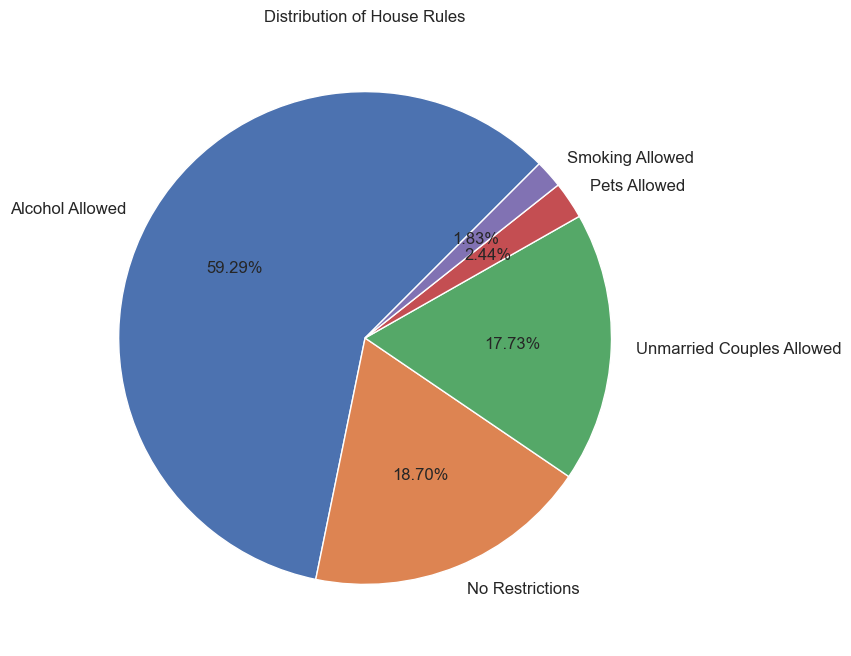

In [30]:
import matplotlib.pyplot as plt

# Get the counts of each house rule
house_rule_counts = df['House_Rule'].value_counts()

# Create a pie chart for house rules
plt.figure(figsize=(8, 8))
plt.pie(
    x=house_rule_counts.values, 
    labels=house_rule_counts.index, 
    autopct="%.2f%%", 
    startangle=45, 
    textprops={'fontsize': 12}
)
plt.title('Distribution of House Rules')
plt.show()


 - **Observations**:
 - Alcohol Allowed is significantly more prevalent than the other house rules, suggesting that it is a common feature among the items.
- No Restrictions and Unmarried Couples Allowed have relatively similar percentages, indicating that they are both fairly common.
- Pets Allowed and Smoking Allowed are much less common, suggesting that they are less frequently offered or preferred by customers

In [ ]:
df.columns

In [ ]:
import matplotlib.pyplot as plt

# Get the counts of each hotel type
hotel_type_counts = df['hotel_type'].value_counts()

# Create a pie chart for hotel types
plt.figure(figsize=(8, 8))
plt.pie(
    x=hotel_type_counts.values, 
    labels=hotel_type_counts.index, 
    autopct="%.2f%%", 
    startangle=45, 
    textprops={'fontsize': 12}
)
plt.title('Distribution of Hotel Types')
plt.show()


#### 

In [41]:
import plotly.express as px

# Create box plot using Plotly
fig = px.box(df, x='House_Rule', y='Final_price', title='Box Plot of Final Price by House Rule')

# Update layout for better display
fig.update_layout(
    xaxis_title='House Rule',
    yaxis_title='Final Price',
    xaxis_tickangle=-45,
    width=700, height=500
)

# Show the plot
fig.show();


- Unmarried Couples Allowed and Alcohol Allowed have similar distributions of discounted prices, suggesting that these house rules do not have a significant impact on pricing.
- No Restrictions tend to have slightly higher discounted prices compared to the overall distribution.
- Pets Allowed and Smoking Allowed tend to have lower discounted prices compared to the overall distribution.

In [ ]:
df.House_Rule.unique()

In [ ]:
df[(df['House_Rule']=='Smoking Allowed') & (df['Final_price']>10800)]

df[(df['House_Rule']=='Unmarried Couples Allowed') & (df['Final_price']>8453)]

df[(df['House_Rule']=='Alcohol Allowed') & (df['Final_price']>10620)]

df[(df['House_Rule']=='No Restrictions') & (df['Final_price']>11271)]

In [ ]:
crosstab_result = pd.crosstab(df['hotel_type'], df['House_Rule'], margins=True)

# Print the title
print("Distribution of House Rules Across Different Hotel Types")

# Display the crosstab
crosstab_result

In [ ]:
# Calculate the IQR (Interquartile Range) and bounds for detecting outliers
df['Q1'] = df.groupby('House_Rule')['Final_price'].transform(lambda x: x.quantile(0.25))
df['Q3'] = df.groupby('House_Rule')['Final_price'].transform(lambda x: x.quantile(0.75))
df['IQR'] = df['Q3'] - df['Q1']

# Define the outlier boundaries
df['Lower_Bound'] = df['Q1'] - 1.5 * df['IQR']
df['Upper_Bound'] = df['Q3'] + 1.5 * df['IQR']

# Filter the rows where Final_price is outside the bounds
outliers = df[(df['Final_price'] < df['Lower_Bound']) | (df['Final_price'] > df['Upper_Bound'])]

# Display the hotel names and Final_price for the outliers
outlier_hotels = outliers[['Hotel', 'House_Rule', 'Final_price']]
outlier_hotels
